In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math
from ranking import Ranking, FRACTIONAL
%matplotlib inline

In [6]:
def MannWhitneyU_myZ(Sample1,Sample2):        
    NewSample = np.concatenate((Sample1,Sample2),axis=0)
    NewRanks, Groups = get_fract_ranks_and_groups(NewSample)
    SumRanks = 0
    SumRanks2 = 0
    for i in range(Sample1.shape[0]):
        SumRanks += NewRanks[i]
        SumRanks2 += NewRanks[Sample1.shape[0]+i]
    U1 = SumRanks - Sample1.shape[0]*(Sample1.shape[0]+1.0)/2.0
    U2 = SumRanks2 - Sample2.shape[0]*(Sample2.shape[0]+1.0)/2.0
    Umean = Sample1.shape[0]*Sample2.shape[0]/2.0
    GroupsSum = 0
    for index in Groups:
        GroupsSum += (index*index*index - index)/12
    N = Sample1.shape[0]+Sample2.shape[0]
    part1 = Sample1.shape[0]*Sample2.shape[0]/(N*(N-1.0))
    part2 = (N*N*N-N)/12.0
    Ucorr2 = math.sqrt(part1*(part2-GroupsSum))
    if(Ucorr2 != 0):
        Z1 = (U1 - Umean)/Ucorr2
        Z2 = (U2 - Umean)/Ucorr2
    else:
        return (0,0)
    if(Z1 <= Z2):
        if(Z1 < -2.58):
            return (-1, Z1)
    else:
        if(Z2 < -2.58):   
            return (1, Z1)
    return (0, Z1)
def ranks(ranking):
    return list(ranking.ranks())   
def get_fract_ranks(data):
    sort_index = np.argsort(-data)
    sort_list = -np.sort(-data)
    new_ranks = ranks(Ranking(sort_list, FRACTIONAL))
    index_rank = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        new_rank_inv = data.shape[0] - new_ranks[i] - 1
        index_rank[sort_index[i]] = new_rank_inv
    return index_rank
def FriedmanSTest(ResultsFunction, func_num, size, NRuns):
    rankarray = np.zeros((NRuns,size))    
    for i in range(NRuns):
        rankarray[i] = get_fract_ranks(np.transpose(ResultsFunction[:,i,func_num]))
    sumranks = np.zeros(size)
    avgranks = np.zeros(size)
    for i in range(size):
        sumranks[i] = np.sum(rankarray[:,i])
    avgranks = sumranks / NRuns
    raverage = (size+1)/2.0
    FriedmanS = 0
    for i in range(size):
        FriedmanS += (avgranks[i] - raverage)*(avgranks[i] - raverage)
    FriedmanS *= 12*NRuns/(size*(size+1.))
    #print(FriedmanS)
    return avgranks
def get_fract_ranks_and_groups(data):
    sort_index = np.argsort(-data)
    sort_list = -np.sort(-data)
    groups = []
    my_new_ranks = np.zeros(data.shape[0])
    counter = 0
    while(True):
        if(counter == data.shape[0]):
            break
        if(counter == data.shape[0]-1):
            my_new_ranks[counter] = counter
            break
        if(sort_list[counter] != sort_list[counter+1]):
            my_new_ranks[counter] = counter
            counter+=1            
        else:
            avgrank = 0
            start = counter
            while(sort_list[start] == sort_list[counter]):
                avgrank += counter
                counter+=1                
                if(counter == data.shape[0]):
                    break
            avgrank = avgrank / (counter - start)
            groups.append(counter - start)
            for i in range(start,counter):
                my_new_ranks[i] = avgrank
    index_rank = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        new_rank_inv = data.shape[0] - my_new_ranks[i]
        index_rank[sort_index[i]] = new_rank_inv   
    return index_rank, groups
colors_s = [(0.0, 0.0, 0.0),(0.9, 0.0, 0.0),(0.0, 0.9, 0.0),(0.0, 0.0, 0.9),(0.9, 0.9, 0.0),(0.9, 0.0, 0.9),(0.0, 0.9, 0.9),(0.5, 0.5, 0.0),(0.0, 0.5, 0.5)]
markers = ['o','v','^','*','d','s','+','x','P']

In [7]:
PATH = ""
names = ["BlockEA","IEACOP","RDE","mLSHADE_LR","L_SRTDE","jSOa"]
AllRes = np.zeros((6,29,25,1001))
for func in range(29):    
    AllRes[0,func] = np.loadtxt(PATH+names[0]+"_"+str(func+1)+".txt").T
    AllRes[1,func,:,:1000] = np.loadtxt(PATH+names[1]+"_"+str(func+1)+".txt").T
    AllRes[2,func] = np.loadtxt(PATH+names[2]+"_"+str(func+1)+".txt").T
    AllRes[3,func,:,:1000] = np.loadtxt(PATH+names[3]+"_"+str(func+1)+".txt").T
    AllRes[4,func] = np.loadtxt(PATH+names[4]+"_"+str(func+1)+".txt").T
    AllRes[5,func,:,:1000] = np.loadtxt(PATH+names[5]+"_"+str(func+1)+".txt").T

In [8]:
for alg in range(6):
    for func in range(29):
        for run in range(25):
            savedFE = 0
            for it in range(1000):
                if(AllRes[alg,func,run,it] < 1e-8):
                    AllRes[alg,func,run,it] = 0
                    if(savedFE == 0):
                        print(alg,func,run,AllRes[alg,func,run,1000],300*(it+1))
                        AllRes[alg,func,run,1000] = 300*(it+1)
                        savedFE = 1
            if(savedFE == 0):
                print("no",alg,func,run,AllRes[alg,func,run,1000],300000)
                AllRes[alg,func,run,1000] = 300000

no 0 0 0 1.3049074709670094e-08 300000
no 0 0 1 2.751856769123151e-06 300000
no 0 0 2 5.225047061685473e-10 300000
no 0 0 3 5.534559477382572e-10 300000
no 0 0 4 3.183515673299553e-10 300000
no 0 0 5 4.012989052171179e-09 300000
no 0 0 6 3.353761712787673e-12 300000
no 0 0 7 6.485976200565347e-10 300000
no 0 0 8 1.2221335055073723e-11 300000
no 0 0 9 1.263902049686294e-08 300000
no 0 0 10 2.2765220819565e-09 300000
no 0 0 11 2.0023094293719623e-11 300000
no 0 0 12 1.7337242752546445e-12 300000
no 0 0 13 2.6645352591003757e-11 300000
no 0 0 14 7.531752999057062e-13 300000
no 0 0 15 1.805132399113063e-08 300000
no 0 0 16 4.165201517025707e-11 300000
no 0 0 17 1.932363602463738e-09 300000
no 0 0 18 1.9809931472991593e-10 300000
no 0 0 19 3.049365204788046e-09 300000
no 0 0 20 4.676749654208834e-09 300000
no 0 0 21 1.7124079931818414e-11 300000
no 0 0 22 3.311129148642067e-12 300000
no 0 0 23 1.2667555893131066e-10 300000
no 0 0 24 2.3699016082900926e-09 300000
no 0 1 0 3.8381642752938205e

no 0 25 3 495.99165525679723 300000
no 0 25 4 527.5896514838078 300000
no 0 25 5 498.7559032153721 300000
no 0 25 6 490.67413632625784 300000
no 0 25 7 502.6118079027529 300000
no 0 25 8 520.5522656461101 300000
no 0 25 9 505.32953955597503 300000
no 0 25 10 507.53961961480877 300000
no 0 25 11 487.04782657512965 300000
no 0 25 12 521.7580724284883 300000
no 0 25 13 492.3851154367766 300000
no 0 25 14 500.6995326993873 300000
no 0 25 15 490.6186235638489 300000
no 0 25 16 526.7488215780267 300000
no 0 25 17 483.36315307271025 300000
no 0 25 18 495.8829470465238 300000
no 0 25 19 501.52228110937966 300000
no 0 25 20 505.3027187508364 300000
no 0 25 21 504.4843754192549 300000
no 0 25 22 482.8560071033285 300000
no 0 25 23 531.0493564856918 300000
no 0 25 24 487.2639928879178 300000
no 0 26 0 504.56223695184326 300000
no 0 26 1 512.3375153217721 300000
no 0 26 2 504.3164561012636 300000
no 0 26 3 506.90352035493015 300000
no 0 26 4 516.6283864148354 300000
no 0 26 5 512.2099383458954 300

no 1 19 23 0.0 300000
no 1 19 24 0.0 300000
no 1 20 0 0.0 300000
no 1 20 1 0.0 300000
no 1 20 2 0.0 300000
no 1 20 3 0.0 300000
no 1 20 4 0.0 300000
no 1 20 5 0.0 300000
no 1 20 6 0.0 300000
no 1 20 7 0.0 300000
no 1 20 8 0.0 300000
no 1 20 9 0.0 300000
no 1 20 10 0.0 300000
no 1 20 11 0.0 300000
no 1 20 12 0.0 300000
no 1 20 13 0.0 300000
no 1 20 14 0.0 300000
no 1 20 15 0.0 300000
no 1 20 16 0.0 300000
no 1 20 17 0.0 300000
no 1 20 18 0.0 300000
no 1 20 19 0.0 300000
no 1 20 20 0.0 300000
no 1 20 21 0.0 300000
no 1 20 22 0.0 300000
no 1 20 23 0.0 300000
no 1 20 24 0.0 300000
no 1 21 0 0.0 300000
no 1 21 1 0.0 300000
no 1 21 2 0.0 300000
no 1 21 3 0.0 300000
no 1 21 4 0.0 300000
no 1 21 5 0.0 300000
no 1 21 6 0.0 300000
no 1 21 7 0.0 300000
no 1 21 8 0.0 300000
no 1 21 9 0.0 300000
no 1 21 10 0.0 300000
no 1 21 11 0.0 300000
no 1 21 12 0.0 300000
no 1 21 13 0.0 300000
no 1 21 14 0.0 300000
no 1 21 15 0.0 300000
no 1 21 16 0.0 300000
no 1 21 17 0.0 300000
no 1 21 18 0.0 300000
no 1 21 

no 2 14 24 3.64265 300000
no 2 15 0 22.4937 300000
no 2 15 1 16.2616 300000
no 2 15 2 32.2882 300000
no 2 15 3 11.9371 300000
no 2 15 4 18.4167 300000
no 2 15 5 34.4205 300000
no 2 15 6 34.208 300000
no 2 15 7 36.4219 300000
no 2 15 8 10.0022 300000
no 2 15 9 32.811 300000
no 2 15 10 29.1345 300000
no 2 15 11 34.7948 300000
no 2 15 12 44.2993 300000
no 2 15 13 42.0341 300000
no 2 15 14 34.7338 300000
no 2 15 15 29.5434 300000
no 2 15 16 8.33267 300000
no 2 15 17 44.5874 300000
no 2 15 18 18.5664 300000
no 2 15 19 33.2225 300000
no 2 15 20 37.3919 300000
no 2 15 21 30.8435 300000
no 2 15 22 31.4854 300000
no 2 15 23 47.944 300000
no 2 15 24 37.1108 300000
no 2 16 0 20.5317 300000
no 2 16 1 20.4937 300000
no 2 16 2 20.5256 300000
no 2 16 3 20.569 300000
no 2 16 4 20.5289 300000
no 2 16 5 20.5334 300000
no 2 16 6 21.4772 300000
no 2 16 7 20.5191 300000
no 2 16 8 21.5178 300000
no 2 16 9 20.5076 300000
no 2 16 10 20.4473 300000
no 2 16 11 20.5544 300000
no 2 16 12 21.2891 300000
no 2 16 13

no 3 10 4 0.0 300000
no 3 10 5 0.0 300000
no 3 10 6 0.0 300000
no 3 10 7 0.0 300000
no 3 10 8 0.0 300000
no 3 10 9 0.0 300000
no 3 10 10 0.0 300000
no 3 10 11 0.0 300000
no 3 10 12 0.0 300000
no 3 10 13 0.0 300000
no 3 10 14 0.0 300000
no 3 10 15 0.0 300000
no 3 10 16 0.0 300000
no 3 10 17 0.0 300000
no 3 10 18 0.0 300000
no 3 10 19 0.0 300000
no 3 10 20 0.0 300000
no 3 10 21 0.0 300000
no 3 10 22 0.0 300000
no 3 10 23 0.0 300000
no 3 10 24 0.0 300000
no 3 11 0 0.0 300000
no 3 11 1 0.0 300000
no 3 11 2 0.0 300000
no 3 11 3 0.0 300000
no 3 11 4 0.0 300000
no 3 11 5 0.0 300000
no 3 11 6 0.0 300000
no 3 11 7 0.0 300000
no 3 11 8 0.0 300000
no 3 11 9 0.0 300000
no 3 11 10 0.0 300000
no 3 11 11 0.0 300000
no 3 11 12 0.0 300000
no 3 11 13 0.0 300000
no 3 11 14 0.0 300000
no 3 11 15 0.0 300000
no 3 11 16 0.0 300000
no 3 11 17 0.0 300000
no 3 11 18 0.0 300000
no 3 11 19 0.0 300000
no 3 11 20 0.0 300000
no 3 11 21 0.0 300000
no 3 11 22 0.0 300000
no 3 11 23 0.0 300000
no 3 11 24 0.0 300000
no 3

4 4 24 224501.0 224700
no 4 5 0 300000.0 300000
no 4 5 1 300000.0 300000
no 4 5 2 300000.0 300000
no 4 5 3 300000.0 300000
no 4 5 4 300000.0 300000
no 4 5 5 300000.0 300000
no 4 5 6 300000.0 300000
no 4 5 7 300000.0 300000
no 4 5 8 300000.0 300000
no 4 5 9 300000.0 300000
no 4 5 10 300000.0 300000
no 4 5 11 300000.0 300000
no 4 5 12 300000.0 300000
no 4 5 13 300000.0 300000
no 4 5 14 300000.0 300000
no 4 5 15 300000.0 300000
no 4 5 16 300000.0 300000
no 4 5 17 300000.0 300000
no 4 5 18 300000.0 300000
no 4 5 19 300000.0 300000
no 4 5 20 300000.0 300000
no 4 5 21 300000.0 300000
no 4 5 22 300000.0 300000
no 4 5 23 300000.0 300000
no 4 5 24 300000.0 300000
no 4 6 0 300000.0 300000
no 4 6 1 300000.0 300000
no 4 6 2 300000.0 300000
no 4 6 3 300000.0 300000
no 4 6 4 300000.0 300000
4 6 5 226339.0 226500
no 4 6 6 300000.0 300000
no 4 6 7 300000.0 300000
4 6 8 231212.0 231300
no 4 6 9 300000.0 300000
no 4 6 10 300000.0 300000
no 4 6 11 300000.0 300000
no 4 6 12 300000.0 300000
no 4 6 13 30000

no 4 28 16 300000.0 300000
no 4 28 17 300000.0 300000
no 4 28 18 300000.0 300000
no 4 28 19 300000.0 300000
no 4 28 20 300000.0 300000
no 4 28 21 300000.0 300000
no 4 28 22 300000.0 300000
no 4 28 23 300000.0 300000
no 4 28 24 300000.0 300000
5 0 0 0.0 175800
5 0 1 0.0 176700
5 0 2 0.0 175500
5 0 3 0.0 175200
5 0 4 0.0 177600
5 0 5 0.0 176400
5 0 6 0.0 175500
5 0 7 0.0 174600
5 0 8 0.0 176100
5 0 9 0.0 176700
5 0 10 0.0 175800
5 0 11 0.0 175800
5 0 12 0.0 174300
5 0 13 0.0 176400
5 0 14 0.0 176100
5 0 15 0.0 174600
5 0 16 0.0 176400
5 0 17 0.0 175800
5 0 18 0.0 176400
5 0 19 0.0 176100
5 0 20 0.0 174900
5 0 21 0.0 174300
5 0 22 0.0 174900
5 0 23 0.0 176400
5 0 24 0.0 176400
5 1 0 0.0 166500
5 1 1 0.0 166200
5 1 2 0.0 166200
5 1 3 0.0 165600
5 1 4 0.0 166500
5 1 5 0.0 165000
5 1 6 0.0 164100
5 1 7 0.0 165000
5 1 8 0.0 165000
5 1 9 0.0 165600
5 1 10 0.0 166500
5 1 11 0.0 166800
5 1 12 0.0 167100
5 1 13 0.0 165600
5 1 14 0.0 165600
5 1 15 0.0 166500
5 1 16 0.0 165000
5 1 17 0.0 165000
5 1

no 5 23 16 0.0 300000
no 5 23 17 0.0 300000
no 5 23 18 0.0 300000
no 5 23 19 0.0 300000
no 5 23 20 0.0 300000
no 5 23 21 0.0 300000
no 5 23 22 0.0 300000
no 5 23 23 0.0 300000
no 5 23 24 0.0 300000
no 5 24 0 0.0 300000
no 5 24 1 0.0 300000
no 5 24 2 0.0 300000
no 5 24 3 0.0 300000
no 5 24 4 0.0 300000
no 5 24 5 0.0 300000
no 5 24 6 0.0 300000
no 5 24 7 0.0 300000
no 5 24 8 0.0 300000
no 5 24 9 0.0 300000
no 5 24 10 0.0 300000
no 5 24 11 0.0 300000
no 5 24 12 0.0 300000
no 5 24 13 0.0 300000
no 5 24 14 0.0 300000
no 5 24 15 0.0 300000
no 5 24 16 0.0 300000
no 5 24 17 0.0 300000
no 5 24 18 0.0 300000
no 5 24 19 0.0 300000
no 5 24 20 0.0 300000
no 5 24 21 0.0 300000
no 5 24 22 0.0 300000
no 5 24 23 0.0 300000
no 5 24 24 0.0 300000
no 5 25 0 0.0 300000
no 5 25 1 0.0 300000
no 5 25 2 0.0 300000
no 5 25 3 0.0 300000
no 5 25 4 0.0 300000
no 5 25 5 0.0 300000
no 5 25 6 0.0 300000
no 5 25 7 0.0 300000
no 5 25 8 0.0 300000
no 5 25 9 0.0 300000
no 5 25 10 0.0 300000
no 5 25 11 0.0 300000
no 5 25 

In [9]:
#Mann-Whitney comparison
NFuncs = 29
NRuns = 25
MaxFEval = 300000
for alg1index in range(0,6):
    for alg2index in range(4,5):
        total = 0
        total2 = 0
        nplus = 0
        nminus = 0
        neq = 0
        for FNum in range(0,NFuncs):        
            avg1FE = np.reshape(AllRes[alg1index,FNum,:,-1],NRuns)#final NFE
            avg1ER = np.reshape(AllRes[alg1index,FNum,:,-2],NRuns)#final error
            avg2FE = np.reshape(AllRes[alg2index,FNum,:,-1],NRuns)#final NFE
            avg2ER = np.reshape(AllRes[alg2index,FNum,:,-2],NRuns)#final error
            avg1 = np.zeros(25)
            avg2 = np.zeros(25)          
            for i in range(25):
                if(avg1FE[i] == MaxFEval):
                    avg1[i] = avg1ER[i]
                else:
                    avg1[i] = avg1FE[i]*10e-9/MaxFEval
                if(avg2FE[i] == MaxFEval):
                    avg2[i] = avg2ER[i]
                else:
                    avg2[i] = avg2FE[i]*10e-9/MaxFEval
            #print(FNum+1,avg1,avg2)
            test = MannWhitneyU_myZ(avg1,avg2)
            total += test[0]
            if(np.isnan(test[1]) == False):
                total2 += test[1]        
            if(test[0] == 1):
                nplus += 1
            if(test[0] == -1):
                nminus += 1
            if(test[0] == 0):
                neq += 1
            print("func",FNum+1,test,np.mean(avg1ER),np.mean(avg2ER),np.mean(avg1FE),np.mean(avg2FE))
        print()
        print(names[alg1index],'vs',names[alg2index],"(",nplus,"+/",neq,"=/",nminus,"-) total:",total,", Z-score:",total2)
    print()
    print()

func 1 (1, 6.071121103859777) 2797.956637000258 0.0 300000.0 173496.0
func 2 (1, 6.066595917089495) 277236053016.0318 0.0 300000.0 154296.0
func 3 (1, 6.428785635743144) 15913.673879286946 58.783832000000004 300000.0 300000.0
func 4 (1, 6.105460214639266) 18.667122268344784 2.30830708 300000.0 297048.0
func 5 (1, 4.999235518479877) 7.03855879102057e-05 3.497936e-08 282696.0 237864.0
func 6 (-1, -6.063536210758361) 6.336143046610232e-06 38.077436000000006 265104.0 300000.0
func 7 (1, 6.078881225164687) 20.259311524840182 2.3481050399999996 300000.0 291732.0
func 8 (1, 6.066012758776402) 1.3450084001054576 0.0 291492.0 67848.0
func 9 (-1, -6.007779036292149) 1.376265998561862 288.1107508 270900.0 300000.0
func 10 (1, 6.06630431691066) 1139.502280258383 0.19899187999999998 300000.0 210516.0
func 11 (1, 6.063681806095584) 30.183813711882102 1.27594892 300000.0 300000.0
func 12 (1, 6.063390625908324) 2658.0745270952775 9.794900161556061 300000.0 295212.0
func 13 (1, 6.063390625908324) 75087

In [10]:
#Friedman
tocompare = [0,1,2,3,4,5]
NTests = len(tocompare)
NDim = 1
dimindex = 0
FRTotal = np.zeros((NDim,NTests))  
DIM = 30      
for FNum in range(0,NFuncs):   
    if(FNum == 1):
        continue
    ResFunction = np.zeros((NTests,NRuns,NFuncs))    
    FRFunc = np.zeros(NTests) 
    for i2,alg2 in enumerate(tocompare):     
        avg1FE = np.reshape(AllRes[alg2,FNum,:,-1],NRuns)    
        avg1ER = np.reshape(AllRes[alg2,FNum,:,-2],NRuns)      
        avg1 = np.copy(avg1ER)
        for i in range(NRuns):
            if(avg1FE[i] == MaxFEval):
                avg1[i] = avg1ER[i]
            else:
                avg1[i] = avg1FE[i]*10e-9/MaxFEval   
        ResFunction[i2,:,FNum] = avg1
    FRFunc = FriedmanSTest(ResFunction, FNum, NTests, NRuns)+1
    FRTotal[dimindex,:] += FRFunc
    #print(sum(FRFunc))
print("Friedman ranking:")
tmp2 = ""
for i2,alg2 in enumerate(tocompare):
    tmp2+= names[alg2]  
    #for dimindex in range(0,NDim):
    #    tmp2 +=  " & "+' %.2f'%(FRTotal[dimindex,i2])+''
    tmp2 += " & "+' %.2f'%(np.sum(FRTotal[:,i2]))+''
    tmp2 += "\\\\\n"
    #tmp2 += "\\hline\n"
print(tmp2)

Friedman ranking:
BlockEA &  123.36\\
IEACOP &  139.08\\
RDE &  76.36\\
mLSHADE_LR &  94.24\\
L_SRTDE &  57.08\\
jSOa &  97.88\\



In [11]:
#U-scores
tocompare = [0,1,2,3,4,5]
NTests = len(tocompare)
NDim = 1
FRTotal = np.zeros((NDim,NTests))  
NRuns = 25
for dimindex in range(0,1):    
    #DIM = DIMs[dimindex]     
    for FNum in range(0,NFuncs):
        if(FNum == 1):
            continue
        for i1,alg1 in enumerate(tocompare):
            for i2,alg2 in enumerate(tocompare):
                if(i1 < i2): 
                    #print(alg1,alg2)
                    avg1FE = np.reshape(AllRes[alg1,FNum,:,-1],NRuns)
                    avg1ER = np.reshape(AllRes[alg1,FNum,:,-2],NRuns)
                    avg2FE = np.reshape(AllRes[alg2,FNum,:,-1],NRuns)
                    avg2ER = np.reshape(AllRes[alg2,FNum,:,-2],NRuns)
                    avg1 = np.zeros(NRuns)
                    avg2 = np.zeros(NRuns)
                    #print(avg1ER)
                    #print(avg2ER)
                    #print(avg1FE)
                    #print(avg2FE)
                    for i in range(NRuns):
                        if(avg1FE[i] == MaxFEval):
                            avg1[i] = avg1ER[i]
                            #print(i,"ER")
                        else:
                            avg1[i] = avg1FE[i]*10e-9/MaxFEval
                            #avg1[i] = avg1ER[i]
                            #print(i,"FE+ER",avg1FE[i],MaxFEval[dimtest-1])
                        if(avg2FE[i] == MaxFEval):
                            avg2[i] = avg2ER[i]
                            #print(i,"ER")
                        else:
                            avg2[i] = avg2FE[i]*10e-9/MaxFEval       
                            #avg2[i] = avg2ER[i]
                            #print(i,"FE+ER",avg1FE[i],MaxFEval[dimtest-1])
                        #avg1 = np.copy(avg1ER)
                        
                    Sample1 = avg1
                    Sample2 = avg2
                    NewSample = -np.concatenate((Sample1,Sample2),axis=0)
                    NewRanks, Groups = get_fract_ranks_and_groups(NewSample)
                    SumRanks = 0
                    SumRanks2 = 0
                    for i in range(Sample1.shape[0]):
                        SumRanks += NewRanks[i]
                        SumRanks2 += NewRanks[Sample1.shape[0]+i]
                    U1 = SumRanks - Sample1.shape[0]*(Sample1.shape[0]+1.0)/2.0
                    U2 = SumRanks2 - Sample2.shape[0]*(Sample2.shape[0]+1.0)/2.0
                    #print(i1,i2)
                    #print(Sample1,Sample2)
                    #print(NewRanks)
                    #print(FNum,U1,U2,np.median(Sample1),np.median(Sample2))
                    FRTotal[dimindex,i1] += U1
                    FRTotal[dimindex,i2] += U2                    
                    #print(SumRanks,SumRanks2)
    #print(FRTotal[dimindex])
print("U-scores:")
tmp2 = ""
for i2,alg2 in enumerate(tocompare):
    tmp2+= names[alg2]  
    #for dimindex in range(0,2):
    #    tmp2 +=  " & "+' %.1f'%(FRTotal[dimindex,i2])+''
    tmp2 += " & "+' %.1f'%(np.sum(FRTotal[:,i2]))+''
    tmp2 += "\\\\\n"
    #tmp2 += "\\hline\n"
print(tmp2)

U-scores:
BlockEA &  28188.0\\
IEACOP &  17877.0\\
RDE &  57437.0\\
mLSHADE_LR &  46214.5\\
L_SRTDE &  69302.5\\
jSOa &  43481.0\\



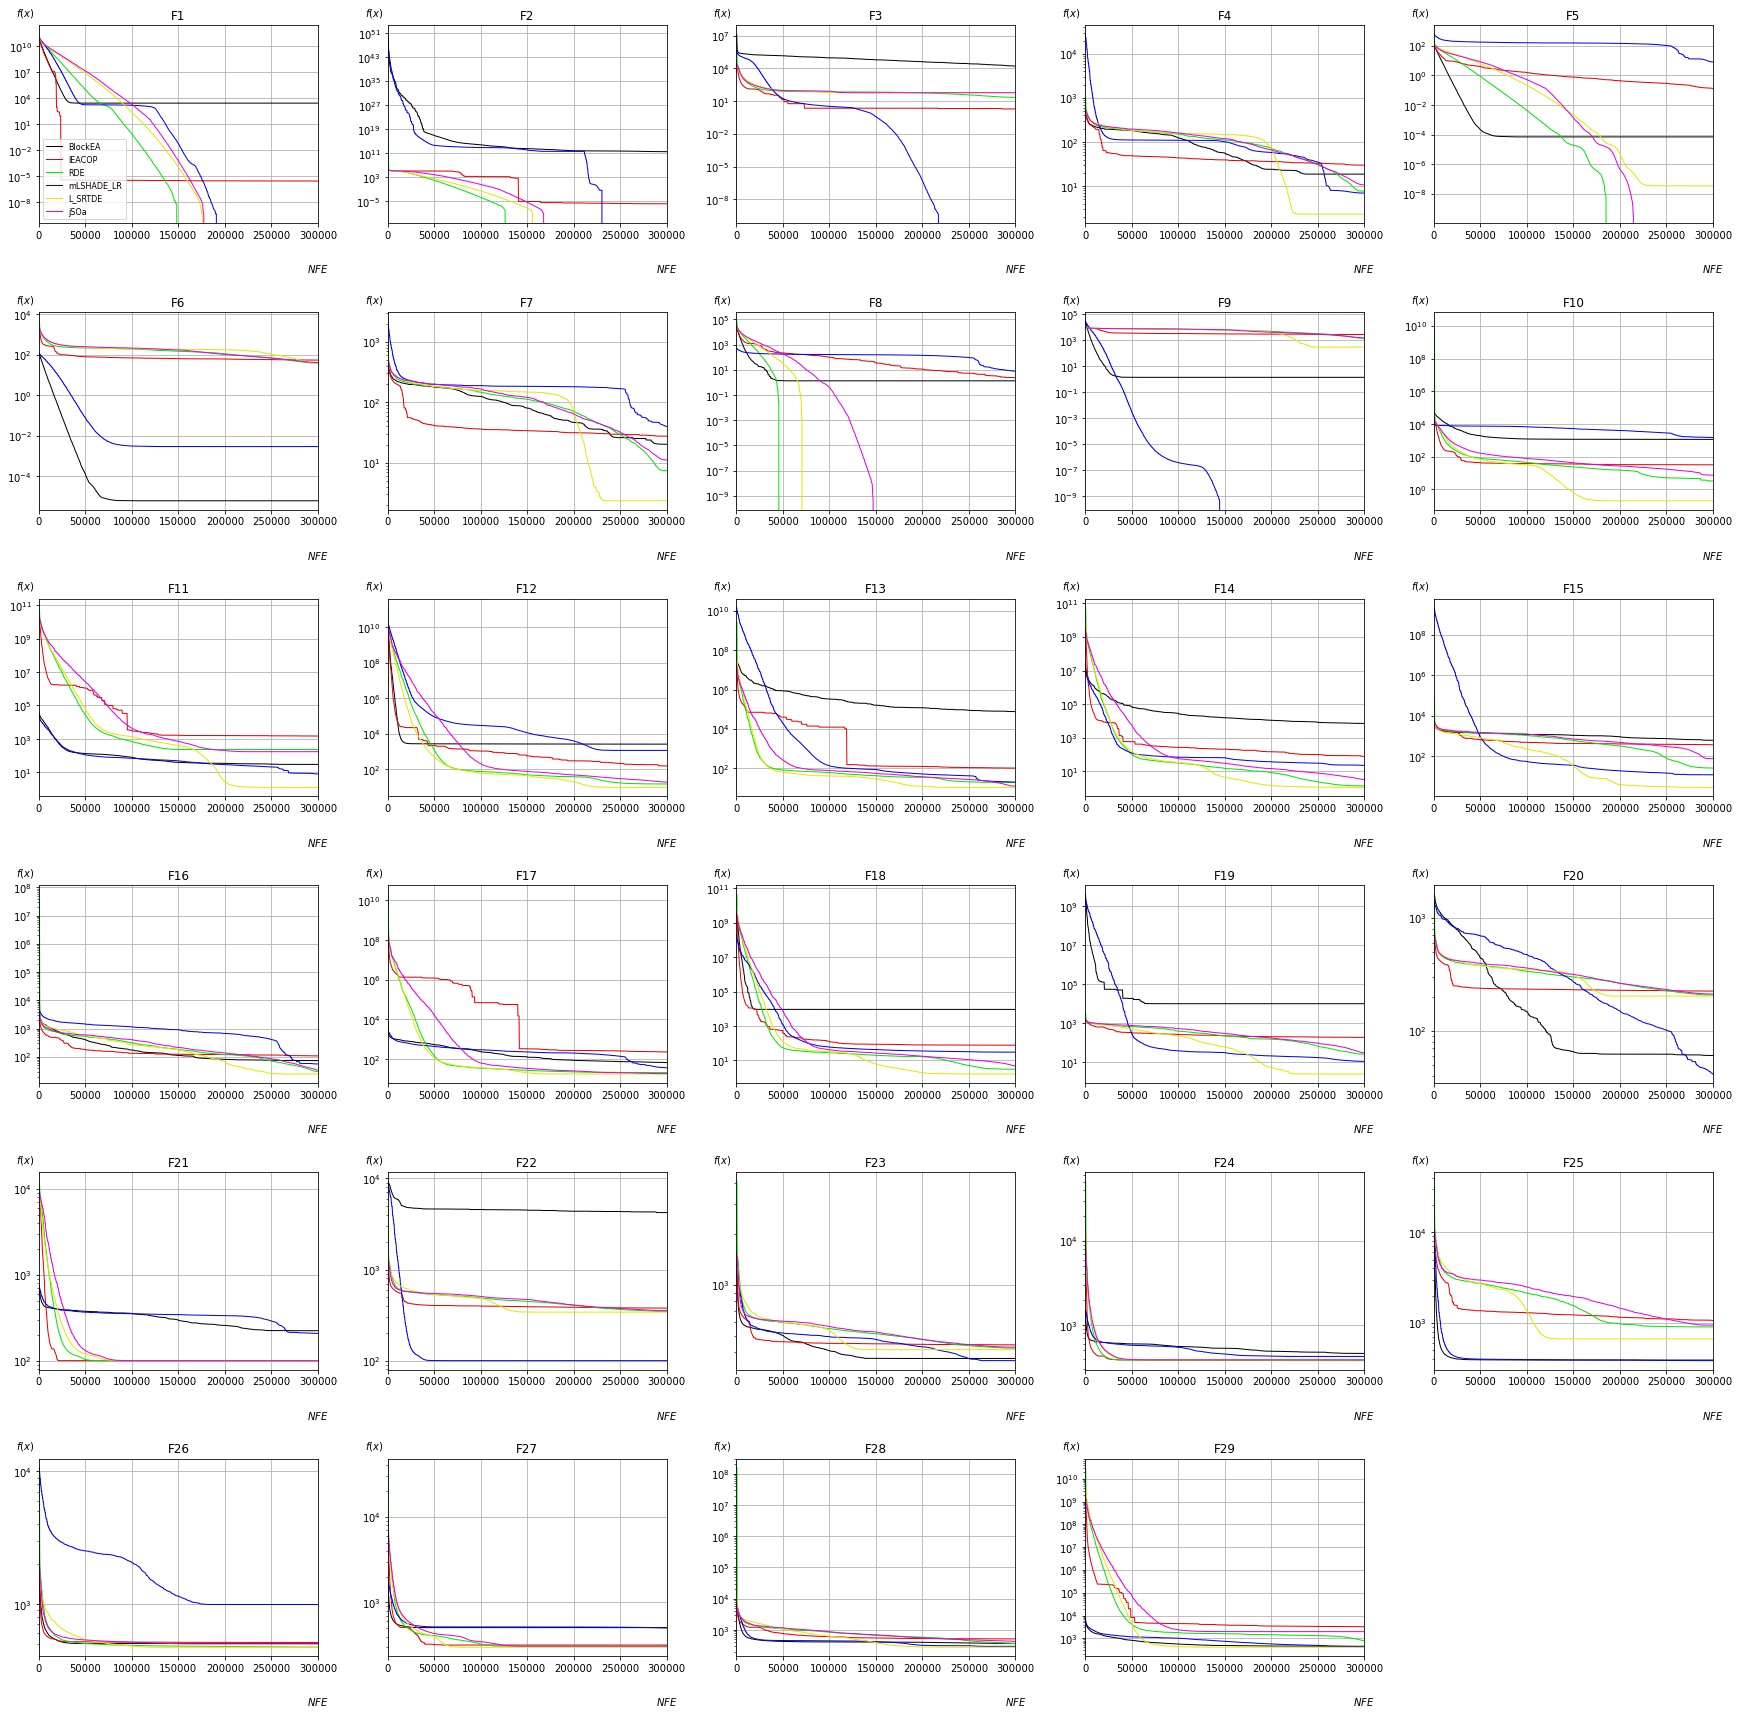

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
ticks_graph = []
DIM = 30
new_ticks = np.zeros(1000)
for k in range(1000):
    new_ticks[k] = DIM*10*(k+1)
    if(k%100*DIM == 0):
        ticks_graph.append(str(int(new_ticks[k])))
        
MaxFE = 300000

fig = plt.figure(figsize=(30, 30))
gs = gridspec.GridSpec(6,5)
gs.update(wspace=0.25, hspace=0.45) # set the spacing between axes. 
ax = []
for i in range(29):
    ax.append(plt.subplot(gs[i]))        
for FNum in range(0,29):       
    lines = []            
    ax[FNum].grid(True)  

    alg1 = names[0]
    cut1 = AllRes[0][FNum]
    avg1 = np.zeros(1000)
    for i in range(1000):
        avg1[i] = np.mean(cut1[:,i])
    line1, = ax[FNum].plot(new_ticks, avg1, color=colors_s[0],
                     lw=1, linestyle='-')
    lines.append(line1)

    alg2 = names[1]
    cut2 = AllRes[1][FNum]
    avg2 = np.zeros(1000)
    for i in range(1000):
        avg2[i] = np.mean(cut2[:,i])
    line2, = ax[FNum].plot(new_ticks, avg2, color=colors_s[1],
                     lw=1, linestyle='-')
    lines.append(line2) 

    alg3 = names[2]
    cut3 = AllRes[2][FNum]
    avg3 = np.zeros(1000)
    for i in range(1000):
        avg3[i] = np.mean(cut3[:,i])
    line3, = ax[FNum].plot(new_ticks, avg3, color=colors_s[2],
                     lw=1, linestyle='-')
    lines.append(line3) 

    alg4 = names[3]
    cut4 = AllRes[3][FNum]
    avg4 = np.zeros(1000)
    for i in range(1000):
        avg4[i] = np.mean(cut4[:,i])
    line4, = ax[FNum].plot(new_ticks, avg4, color=colors_s[3],
                     lw=1, linestyle='-')
    lines.append(line4) 

    alg5 = names[4]
    cut5 = AllRes[4][FNum]
    avg5 = np.zeros(1000)
    for i in range(1000):
        avg5[i] = np.mean(cut5[:,i])
    line5, = ax[FNum].plot(new_ticks, avg5, color=colors_s[4],
                     lw=1, linestyle='-')
    lines.append(line5) 

    alg6 = names[5]
    cut6 = AllRes[5][FNum]
    avg6 = np.zeros(1000)
    for i in range(1000):
        avg6[i] = np.mean(cut6[:,i])
    line6, = ax[FNum].plot(new_ticks, avg6, color=colors_s[5],
                     lw=1, linestyle='-')
    lines.append(line6) 

    ax[FNum].set_yscale('log')
    #ax[FNum].set_xscale('log')
    ax[FNum].autoscale(enable=True, axis='y', tight=None)      
    #ax[FNum].set_xticks(ticks=new_ticks)
    #ax[FNum].set_xticklabels(labels=ticks_graph)
    ax[FNum].tick_params(axis='x', rotation=0)
    ax[FNum].set_xlabel(r"$NFE$")
    ax[FNum].xaxis.set_label_coords(1.0, -0.2)
    ax[FNum].set_ylabel(r"$f(x)$", rotation=0)
    ax[FNum].yaxis.set_label_coords(-0.05, 1.03)
    ax[FNum].set_title(r"F"+str(FNum+1)+"")
    ax[FNum].set_xlim(0,MaxFE)

    if(FNum == 0):
        matplotlib.rcParams.update({'font.size': 8})
        ax[FNum].legend(lines, (alg1,alg2,alg3,alg4,alg5,alg6))
        matplotlib.rcParams.update({'font.size': 10})
plt.show()

fig.savefig("comparison_1"+".eps",bbox_inches='tight')
fig.savefig("comparison_1"+".png",bbox_inches='tight')
fig.savefig("comparison_1"+".svg",bbox_inches='tight')
fig.savefig("comparison_1"+".pdf",bbox_inches='tight')